<a href="https://colab.research.google.com/github/qkrcks0/kaggle_rock_scissor_paper/blob/main/kaggle_rock_scissor_paper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# 압축 풀기
!unzip -q /content/drive/MyDrive/kaggle_rock_scissor_paper.zip -d kaggle

In [3]:
import os

In [4]:
train_dir = os.path.join("kaggle/Rock-Paper-Scissors/train/")
test_dir = os.path.join("kaggle/Rock-Paper-Scissors/test/")
val_dir = os.path.join("kaggle/Rock-Paper-Scissors/validation/")

In [5]:
train_dir, test_dir, val_dir

('kaggle/Rock-Paper-Scissors/train/',
 'kaggle/Rock-Paper-Scissors/test/',
 'kaggle/Rock-Paper-Scissors/validation/')

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
import glob

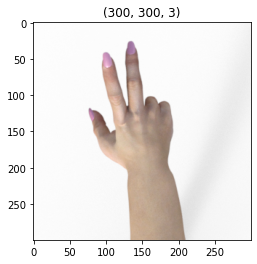

In [7]:
sample_scissor_img_path = os.listdir(train_dir + "scissors")[14]
sample_scissor_img = np.array(load_img(train_dir + "scissors/" + sample_scissor_img_path))
plt.title(sample_scissor_img.shape)
plt.imshow(sample_scissor_img)
plt.show()

In [8]:
train_data = glob.glob(train_dir+"*/*.png")
len(train_data)

2520

In [9]:
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow import keras

In [10]:
input_shape = (300,300,3)
batch_size = 32
num_epochs = 10
learning_rate = 0.0001

In [11]:
def create_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3,3), activation="relu", input_shape=(300,300,3)))
    model.add(layers.MaxPool2D(2,2))
    model.add(layers.Conv2D(64, (3,3), activation="relu", input_shape=(300,300,3)))
    model.add(layers.MaxPool2D(2,2))
    model.add(layers.Conv2D(128, (3,3), activation="relu", input_shape=(300,300,3)))
    model.add(layers.MaxPool2D(2,2))
    model.add(layers.Conv2D(128, (3,3), activation="relu", input_shape=(300,300,3)))
    model.add(layers.MaxPool2D(2,2))
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation="relu"))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(3, activation="softmax"))
    
    return model

In [12]:
model = create_model()

In [13]:
# learning rate scheduling
lr_schedule = keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=learning_rate,
                                                         decay_steps=len(train_data)//batch_size*5,
                                                         decay_rate=0.5,
                                                         staircase=True)

In [14]:
model.compile(optimizer=Adam(lr_schedule),
              loss="categorical_crossentropy",
              metrics=['accuracy'])

In [15]:
train_datagen = ImageDataGenerator(
    zoom_range=0.1,
    rescale=1./255.,
    rotation_range=25,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest",
    )

test_datagen = ImageDataGenerator(
    rescale=1./255.
)

In [16]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(300,300),
                                                    batch_size=batch_size)

test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(300,300), 
                                                  batch_size=batch_size)

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [17]:
train_generator.class_indices

{'paper': 0, 'rock': 1, 'scissors': 2}

In [18]:
label = ["paper", "rock", "scissors"]

In [19]:
history = model.fit(train_generator,
                    steps_per_epoch=len(train_generator),
                    epochs=num_epochs,
                    validation_data=test_generator,
                    validation_steps=len(test_generator))

Epoch 1/10
79/79 [==============================] - 64s 723ms/step - loss: 1.0426 - accuracy: 0.4438 - val_loss: 0.6145 - val_accuracy: 0.8414
Epoch 2/10
79/79 [==============================] - 59s 741ms/step - loss: 0.5385 - accuracy: 0.7973 - val_loss: 0.2803 - val_accuracy: 0.9167
Epoch 3/10
79/79 [==============================] - 57s 714ms/step - loss: 0.2756 - accuracy: 0.9017 - val_loss: 0.2377 - val_accuracy: 0.8925
Epoch 4/10
79/79 [==============================] - 55s 702ms/step - loss: 0.1816 - accuracy: 0.9519 - val_loss: 0.2655 - val_accuracy: 0.8925
Epoch 5/10
79/79 [==============================] - 56s 708ms/step - loss: 0.1401 - accuracy: 0.9589 - val_loss: 0.2709 - val_accuracy: 0.8925
Epoch 6/10
79/79 [==============================] - 56s 706ms/step - loss: 0.0928 - accuracy: 0.9717 - val_loss: 0.2701 - val_accuracy: 0.8898
Epoch 7/10
79/79 [==============================] - 56s 704ms/step - loss: 0.0839 - accuracy: 0.9726 - val_loss: 0.5085 - val_accuracy: 0.8414

In [39]:
save_path = "/content/kaggle/my_rock_scissor_paper_model.h5"
model.save(save_path, include_optimizer=True)

In [20]:
paths = os.listdir(val_dir)

test_imgs = []
for path in paths:
  img = np.array(load_img(val_dir+path))
  test_imgs.append(img)

test_imgs[0].shape

(300, 300, 3)

In [21]:
import cv2

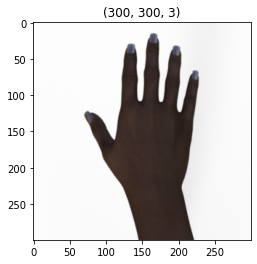

In [37]:
# test_img = cv2.cvtColor(test_imgs[1])
plt.title(test_imgs[6].shape)
plt.imshow(test_imgs[6])
plt.show()

In [32]:
def predict(target_img):
  target_img = cv2.resize(target_img, (300,300), cv2.INTER_AREA)
  pred = model.predict(target_img.reshape((1,300,300,3)))
  predIdx = np.argmax(pred)
  return label[predIdx]

In [36]:
predict(test_imgs[6])

'paper'